In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

numerical_cols = market_data_df.columns[1:]  # Exclude 'coin_id' as it is categorical

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting and transforming the numerical data
market_data_df[numerical_cols] = scaler.fit_transform(market_data_df[numerical_cols])

# Displaying the first few rows of the normalized data to confirm the changes
print(market_data_df.head())


              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                    0.493193   
ethereum                          0.22392                    0.934445   
tether                           -0.21173                   -0.706337   
ripple                           -0.37819                   -0.810928   
bitcoin-cash                      2.90585                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [13]:
# Initialize StandardScaler
scaler = StandardScaler()

# Selecting numerical columns to scale
numerical_cols = market_data_df.columns  # As 'coin_id' is the index, all columns are numerical

# Scale numerical columns
scaled_numerical_data = scaler.fit_transform(market_data_df[numerical_cols])

# Create a new DataFrame with scaled data, keeping the index
scaled_data_df = pd.DataFrame(scaled_numerical_data, columns=numerical_cols, index=market_data_df.index)

# Display a sample of the data to verify everything is correct
print(scaled_data_df.head())




              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

### Find the Best Value for k Using the Original Scaled DataFrame.

In [14]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k_values = list(range(1, 12))

k_values


# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

k_values = list(range(1, 12))
inertia_values = []

for k in k_values:
    # Create a KMeans model with the current value of k
    model = KMeans(n_clusters=k, random_state=42)  # random_state for reproducibility

    # Fit the model to the scaled data
    model.fit(scaled_data_df)

    # Append the inertia to the list
    inertia_values.append(model.inertia_)

inertia_values


# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
# Display the DataFrame

elbow_curve_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}

elbow_curve_df = pd.DataFrame(elbow_curve_data)

print(elbow_curve_df)

/Users/jamesswierczewski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jamesswierczewski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jamesswierczewski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jamesswierczewski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

    k_values  inertia_values
0          1      287.000000
1          2      195.820218
2          3      123.190482
3          4       79.022435
4          5       65.302379
5          6       54.739922
6          7       43.481606
7          8       37.517032
8          9       32.591891
9         10       28.222899
10        11       24.116198


/Users/jamesswierczewski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


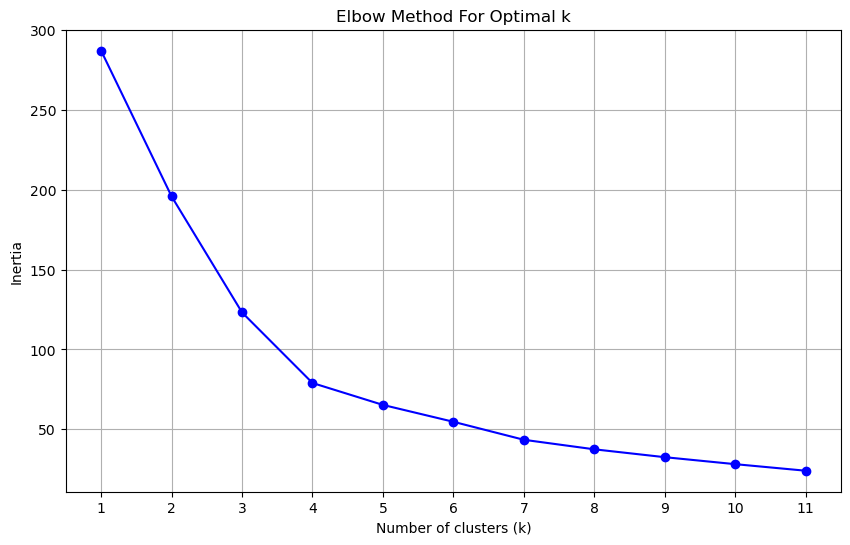

In [16]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  
plt.plot(elbow_curve_df['k_values'], elbow_curve_df['inertia_values'], marker='o', linestyle='-', color='b')  
plt.title('Elbow Method For Optimal k')  
plt.xlabel('Number of clusters (k)')  
plt.ylabel('Inertia')  
plt.xticks(elbow_curve_df['k_values'])  
plt.grid(True) 
plt.show()  

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [17]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4)

In [19]:
# Fit the K-Means model using the scaled data
kmeans.fit(elbow_curve_df)

/Users/jamesswierczewski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [26]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = kmeans.predict(elbow_curve_df)
# View the resulting array of cluster values.
print(predictions)

[1 3 2 2 0 0 0 0 0 0 0]


In [33]:
# Create a copy of the DataFrame
#crypto_data_copy = crypto_data.copy()
crypto_data_copy = predictions.copy()


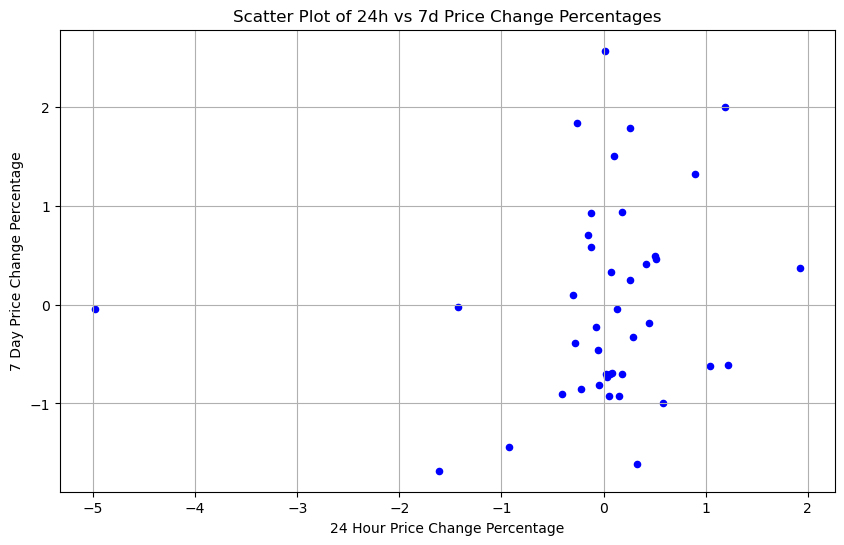

In [44]:
#Create a Scatter Plot 
import matplotlib.pyplot as plt

# Plotting using pandas' built-in functionality
scatter_plot = scaled_data_df.plot(kind='scatter', x='price_change_percentage_24h', y='price_change_percentage_7d', figsize=(10, 6), color='blue', marker='o')

# Adding plot title and labels
plt.title('Scatter Plot of 24h vs 7d Price Change Percentages')
plt.xlabel('24 Hour Price Change Percentage')
plt.ylabel('7 Day Price Change Percentage')
plt.grid(True)  # Adding a grid for better readability
plt.show()  # Display the plot


Optimize the Clusters with Principal Component Analysis (10 points)

In [55]:
from sklearn.decomposition import PCA
import pandas as pd

# Create a PCA model instance with 3 principal components
pca_model = PCA(n_components=3)

# Fit the PCA model to the scaled data and transform the data
pca_transformed_data = pca_model.fit_transform(scaled_data_df)

# Create a DataFrame with the transformed data
pca_transformed_df = pd.DataFrame(data=pca_transformed_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_data_df.index)

# Print the first five rows of the transformed DataFrame
print(pca_transformed_df.head(5))

# Get the explained variance to determine how much information can be attributed to each of the principal components
explained_variance = pca_model.explained_variance_ratio_
print("Explained Variance: ", explained_variance)


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715
Explained Variance:  [0.3719856  0.34700813 0.17603793]


#Answer the following question: What’s the total explained variance of the three principal components? (3 points)

In [56]:
# Retrieve the explained variance
explained_variance = pca_model.explained_variance_ratio_

# Display the explained variance
print(f"Explained Variance by Component: {explained_variance}")
print(f"Total Explained Variance: {sum(explained_variance)}")


Explained Variance by Component: [0.3719856  0.34700813 0.17603793]
Total Explained Variance: 0.8950316570309843


Answer the following question: What’s the total explained variance of the three principal components? (3 points)
Answer: Total Explained Variance: 0.8950316570309843

In [59]:
#Create a new DataFrame with the PCA data. Be sure to set the coin_id index from the original DataFrame as the index for the new DataFrame. Review the resulting DataFrame. (2 points)
from sklearn.decomposition import PCA
import pandas as pd

# Create a PCA model instance with 3 principal components
pca_model = PCA(n_components=3)

# Fit the PCA model to the scaled data and transform the data
pca_transformed_data = pca_model.fit_transform(scaled_data_df)

# Create a DataFrame with the PCA-transformed data using the index from the scaled DataFrame
pca_data_df = pd.DataFrame(data=pca_transformed_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_data_df.index)

# Print the first few rows of the new DataFrame to review the PCA results
print(pca_data_df.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [63]:
#Create a new DataFrame with the PCA data. Be sure to set the coin_id index from the original DataFrame as the index for the new DataFrame. Review the resulting DataFrame. (2 points)
from sklearn.cluster import KMeans

# Assuming pca_data_df is your DataFrame from previous steps with PCA data
# Assuming the number of clusters k has been determined (e.g., through an elbow plot)
# Define the number of clusters
num_clusters = 3  # Adjust this based on your analysis

# Initialize and fit the K-means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
pca_data_df['Cluster'] = kmeans.fit_predict(pca_data_df[['PC1', 'PC2', 'PC3']])

# Review the DataFrame with the new 'Cluster' column
print(pca_data_df.head())


                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        0


/Users/jamesswierczewski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/jamesswierczewski/anaconda3/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:1258: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


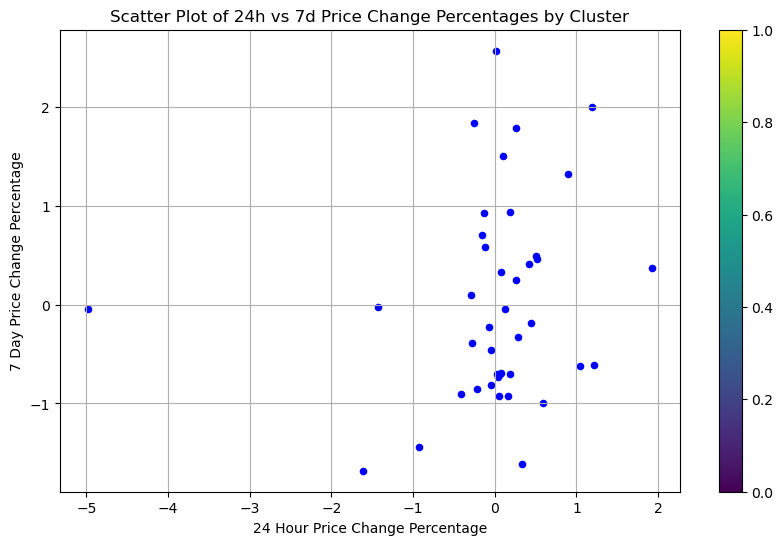

In [68]:
import matplotlib.pyplot as plt

# Now plot using pandas' built-in functionality
ax = scaled_data_df.plot(kind='scatter', 
                          x='price_change_percentage_24h', 
                          y='price_change_percentage_7d', 
                          c='blue',  # This now refers to the existing 'Cluster' column
                          colormap='rainbow',  # Use the rainbow colormap for better visual distinction
                          colorbar=True,  # Include a color bar to indicate cluster groups
                          figsize=(10, 6),  # Set figure size for better visibility
                          marker='o')  # Choose marker style

# Adding plot title and labels
plt.title('Scatter Plot of 24h vs 7d Price Change Percentages by Cluster')
plt.xlabel('24 Hour Price Change Percentage')
plt.ylabel('7 Day Price Change Percentage')
plt.grid(True)  # Enable grid for better readability
plt.show()




### Optimize Clusters with Principal Component Analysis.

In [69]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca_model = PCA(n_components=3)


In [72]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_model = PCA(n_components=3)
pca_transformed_data = pca_model.fit_transform(scaled_data_df)
pca_transformed_df = pd.DataFrame(data=pca_transformed_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_data_df.index)
# View the first five rows of the DataFrame. 
print(pca_transformed_df.head().values)

[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [75]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component
pca_model = PCA(n_components=3)

# Use the PCA model to reduce the features to three principal components
pca_transformed_data = pca_model.fit_transform(scaled_data_df)

# Retrieve and print the explained variance ratio for each principal component
explained_variance_ratio = pca_model.explained_variance_ratio_
print("Explained variance ratio for each principal component:", explained_variance_ratio)

Explained variance ratio for each principal component: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is 0.89503166

In [77]:
# Create a DataFrame from the PCA-transformed data
pca_data_df = pd.DataFrame(data=pca_transformed_data, columns=['PC1', 'PC2', 'PC3'])

# Assuming 'coin_id' was the index of the original scaled DataFrame and it contains the crypto names
# Copy the crypto names from the original data
pca_data_df['coin_id'] = scaled_data_df.index

# Set the 'coin_id' column as the index of the new DataFrame
pca_data_df.set_index('coin_id', inplace=True)

# Display sample data from the new DataFrame
print(pca_data_df.head())



                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


### Find the Best Value for k Using the PCA Data

In [78]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
from sklearn.cluster import KMeans

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data using PCA DataFrame
    model.fit(pca_data_df)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(model.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_curve_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
import pandas as pd

# Display the DataFrame
print(elbow_curve_df)

/Users/jamesswierczewski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jamesswierczewski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jamesswierczewski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jamesswierczewski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

    k_values  inertia_values
0          1      287.000000
1          2      195.820218
2          3      123.190482
3          4       79.022435
4          5       65.302379
5          6       54.739922
6          7       43.481606
7          8       37.517032
8          9       32.591891
9         10       28.222899
10        11       24.116198


/Users/jamesswierczewski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jamesswierczewski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jamesswierczewski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


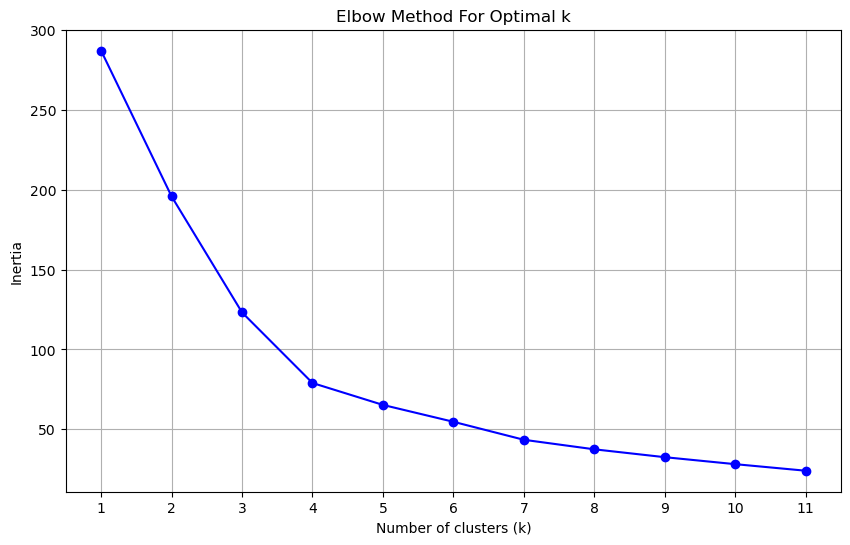

In [79]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

# Assuming you have the 'elbow_curve_df' DataFrame from previous steps
# Plotting the Elbow curve
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.plot(elbow_curve_df['k_values'], elbow_curve_df['inertia_values'], marker='o', linestyle='-', color='b')  # Line plot with markers
plt.title('Elbow Method For Optimal k')  # Title of the plot
plt.xlabel('Number of clusters (k)')  # Label for the x-axis
plt.ylabel('Inertia')  # Label for the y-axis
plt.xticks(elbow_curve_df['k_values'])  # Set x-axis ticks to ensure each k-value is marked
plt.grid(True)  # Enable grid for easier reading
plt.show()  # Display the plot


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, that was also 4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [80]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans
best_k = 4
kmeans_model = KMeans(n_clusters=best_k, random_state=42)


In [81]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_data_df)


/Users/jamesswierczewski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [82]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_data_df['Cluster'] = kmeans_model.labels_


# Print the resulting array of cluster values.
print(pca_data_df.head())


                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        0


In [84]:
# Create a copy of the DataFrame with the PCA data
pca_data_copy = pca_data_df.copy()


# Add a new column to the DataFrame with the predicted clusters
# Display sample data
pca_data_copy['Cluster'] = kmeans_model.fit_predict(pca_data_df[['PC1', 'PC2', 'PC3']])
print(pca_data_copy.head())


                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        2
ripple       -0.471835 -0.222660 -0.479053        2
bitcoin-cash -1.157800  2.041209  1.859715        0


/Users/jamesswierczewski/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [88]:
#create a scatterplot with hvplot 
#came out different from the example plot 
import hvplot.pandas
plot = pca_data_df.hvplot.scatter(x='PC1', y='PC2', title="Scatter Plot of PC1 vs PC2")

plot

:Scatter   [PC1]   (PC2)

### Determine the Weights of Each Feature on each Principal Component

In [89]:
# Use the columns from the original scaled DataFrame as the index.

from sklearn.decomposition import PCA
components = pca_model.components_
feature_names = scaled_data_df.columns
pc_labels = [f"PC{i+1}" for i in range(components.shape[0])]  # PC labels like PC1, PC2, etc.

components_df = pd.DataFrame(components, columns=feature_names, index=pc_labels)
print(components_df)


     price_change_percentage_24h  price_change_percentage_7d  \
PC1                    -0.416728                   -0.102432   
PC2                     0.358162                    0.227432   
PC3                    -0.218795                    0.787670   

     price_change_percentage_14d  price_change_percentage_30d  \
PC1                    -0.009162                     0.191523   
PC2                     0.540415                     0.562182   
PC3                     0.349534                    -0.181744   

     price_change_percentage_60d  price_change_percentage_200d  \
PC1                     0.320365                      0.594468   
PC2                     0.434040                      0.027735   
PC3                    -0.361377                      0.039733   

     price_change_percentage_1y  
PC1                    0.568379  
PC2                   -0.150789  
PC3                    0.210541  


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

PC1: This component is most significantly influenced by the year-long price change percentage, suggesting that long-term trends in price changes drive this component.
The strong negative loading for the 24-hour price change percentage implies that short-term price changes are inversely related to this component, indicating a contrast between short-term volatility and long-term trends.
PC2: The dominant feature here is the 30-day price change percentage, which means this component heavily reflects medium-term market behaviors.
The negative influence from the 1-year price change suggests a slight opposition between medium-term and long-term trends in this component.
PC3: Dominated by the 7-day price change percentage, PC3 seems to capture weekly market trends most effectively.
The negative influence from the 60-day price change percentage could indicate that this component is inversely responsive to two-month market trends, highlighting weekly fluctuations over bi-monthly trends.
    